In [3]:
import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
'''SYNTHETIC DATA GENERATION 1
INCLUDING: {
seasonal_component: amplitude, frequency
trend_component: slope, quadratic_curvature
noise: standard normal distributed with mean=0, sd=1
}
'''

def generate_seasonal_component(t, amplitude, frequency):
    return amplitude * np.sin(2 * np.pi * frequency * t)

def generate_trend_component(t, slope, curvature):
    return slope * t + curvature * t**2

def generate_noise(noise_level):
    return noise_level * np.random.randn(len(t))

def generate_synthetic_time_series(t, amplitude, frequency, slope, curvature):
    seasonal_component = generate_seasonal_component(t, amplitude, frequency)
    trend_component = generate_trend_component(t, slope, curvature)
    
    synthetic_data = seasonal_component + trend_component
    return synthetic_data





# Example usage
t = np.linspace(0, 30, 90)
amplitude = 2.0
frequency = 0.1
slope = 0.1
curvature = 0.01
noise_level = 0.5

synthetic_data = generate_synthetic_time_series(t, amplitude, frequency, slope, curvature)
default_noise = generate_noise(noise_level)
synthetic_data = synthetic_data + default_noise



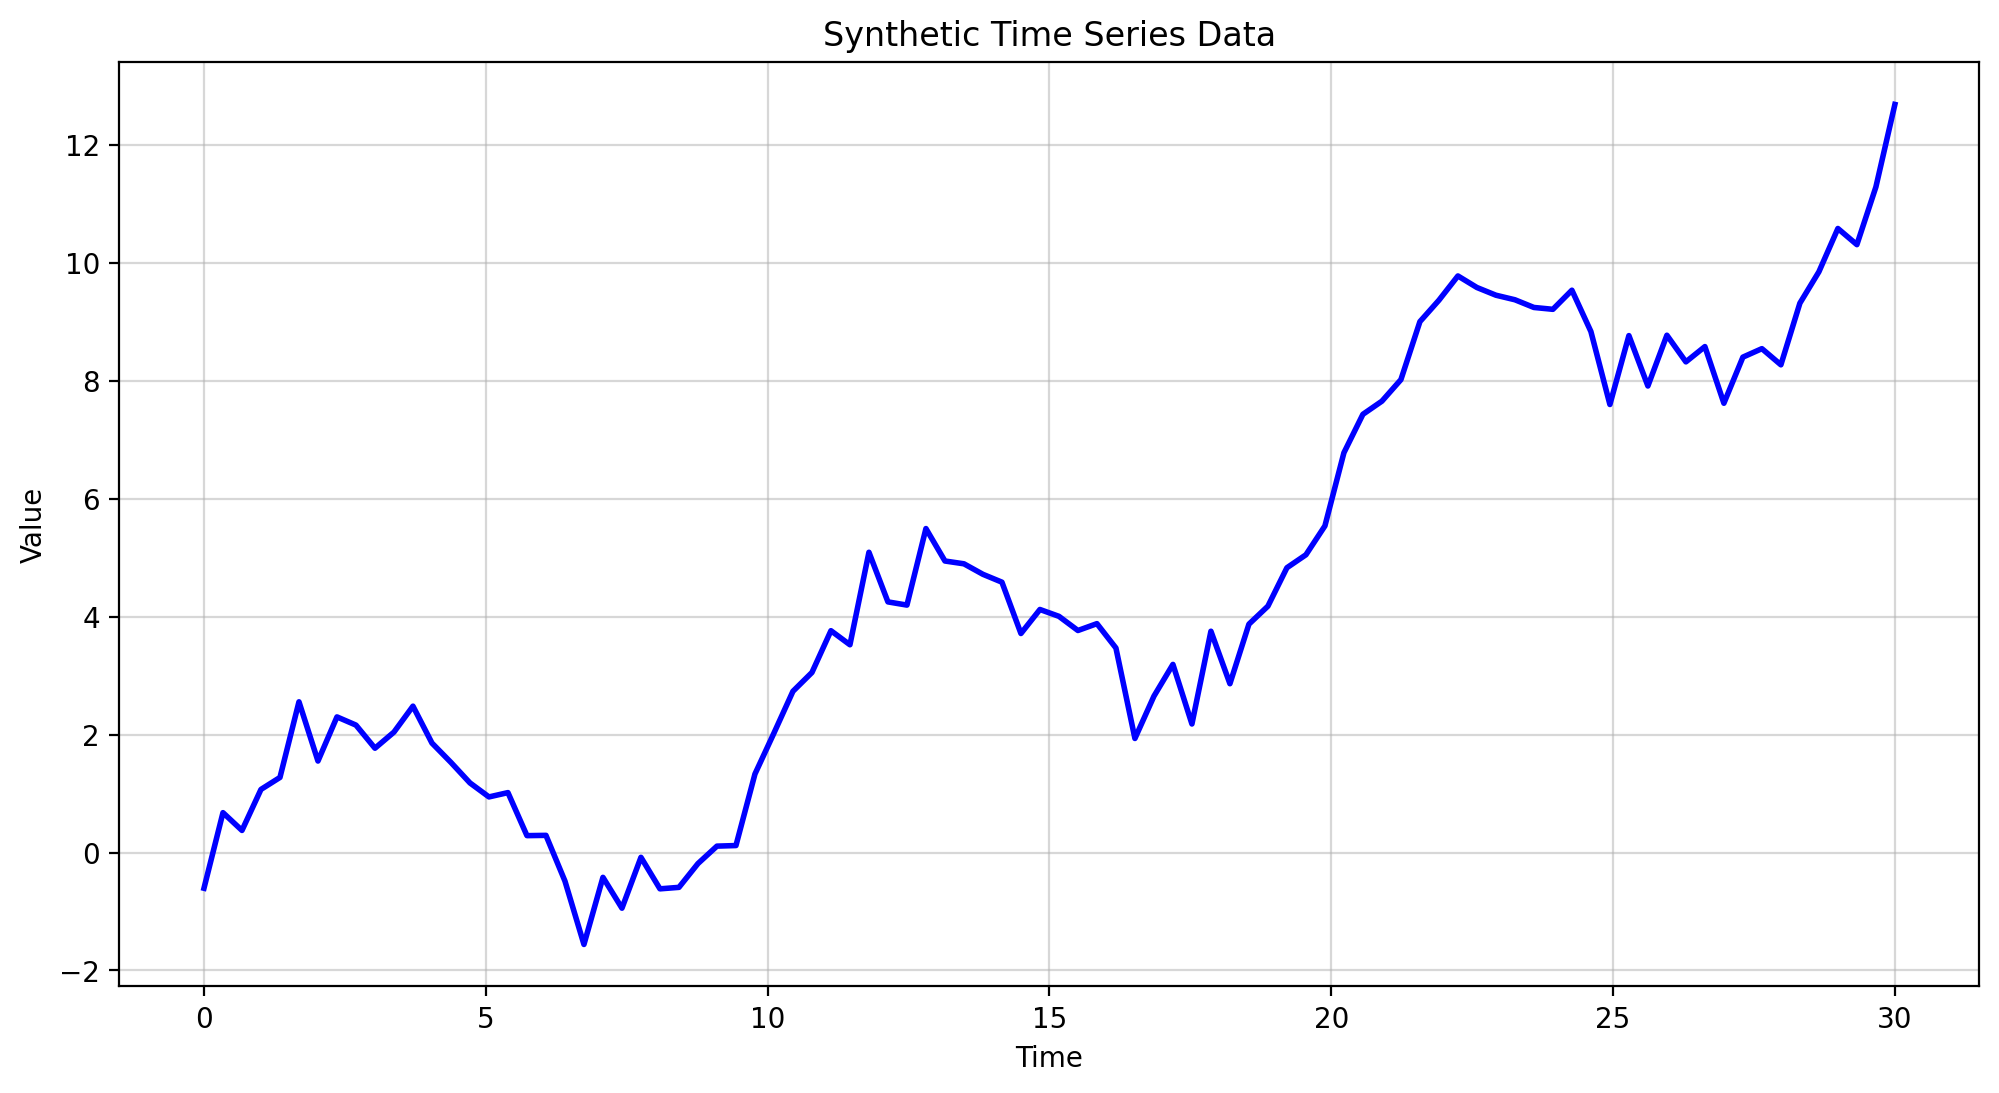

In [6]:
fig, ax = plt.subplots(figsize=(12, 6), dpi=200)

# Plot the synthetic time series data using Seaborn on Matplotlib axis
sns.lineplot(x=t, y=synthetic_data, color='b', linewidth=2, ax=ax)

# Customize Matplotlib axis
ax.set_title('Synthetic Time Series Data')
ax.set_xlabel('Time')
ax.set_ylabel('Value')
ax.grid(alpha=0.5)

In [7]:
'''SYNTHETIC DATA GENERATION 2 (additions are written with CAPS letters)
INCLUDING: {
seasonal_component: amplitude, frequency, SHIFT
trend_component: slope, quadratic_curvature, CUBIC_CURVATURE
noise: standard normal distributed with mean=0, sd=1
AUTOCORELLATION : 
}
'''

def generate_seasonal_component(t, amplitude, frequency, shift):
    return amplitude * np.sin(2 * np.pi * frequency * t + shift)

def generate_trend_component(t, slope, curvature_quadratic, curvature_cubic):
    return slope * t + curvature_quadratic * t**2 + curvature_cubic * t**3

def generate_autoregressive_component(t, ar_coefficients):
    ar_data = np.zeros_like(t)
    for i in range(len(ar_coefficients)):
        if i == 0:
            continue
        ar_data[i] = np.sum(ar_data[:i] * ar_coefficients[:i]) + np.random.randn()    
    return ar_data

def generate_synthetic_time_series(t, amplitude, frequency, slope, shift, curvature_quadratic, curvature_cubic,
                                    noise_level, ar_coefficients=None):
    seasonal_component = generate_seasonal_component(t, amplitude, frequency, shift)
    trend_component = generate_trend_component(t, slope, curvature_quadratic, curvature_cubic)
    noise = noise_level * np.random.randn(len(t))
    
    if ar_coefficients is not None:
        ar_data = generate_autoregressive_component(t, ar_coefficients)
    else:
        ar_data = np.zeros_like(t)

    synthetic_data_2 = seasonal_component + trend_component + noise + ar_data
    return synthetic_data_2


shift = -0.4* np.pi
curvature_quadratic = 0.01
curvature_cubic = 0
ar_coefficients = np.array([0.0, -0.0, 0.0])       


synthetic_data_2 = generate_synthetic_time_series(t, amplitude, frequency, slope, shift, curvature_quadratic, curvature_cubic,
                                    noise_level, ar_coefficients)

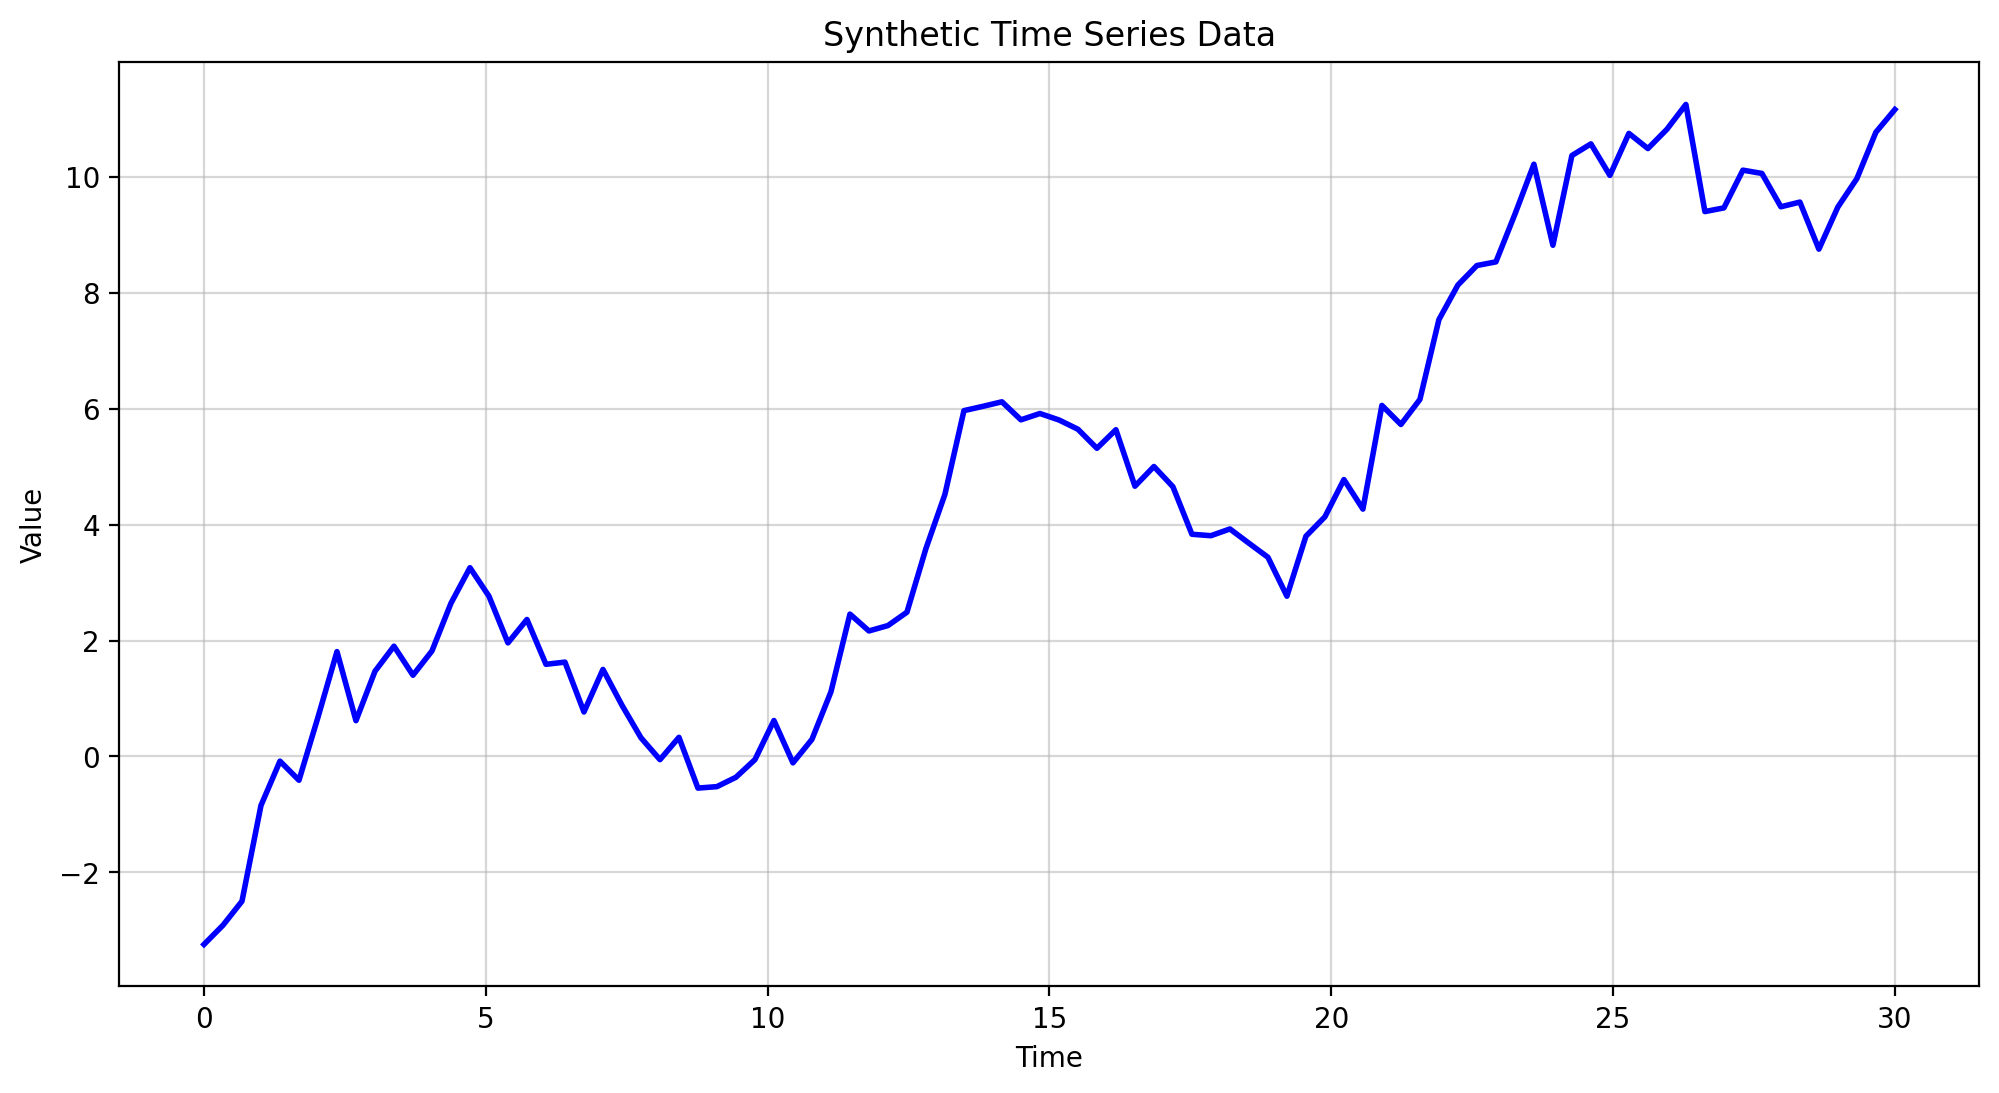

In [8]:
fig, ax = plt.subplots(figsize=(12, 6), dpi=200)

# Plot the synthetic time series data using Seaborn on Matplotlib axis
sns.lineplot(x=t, y=synthetic_data_2, color="b", linewidth=2, ax=ax)

# Customize Matplotlib axis
ax.set_title('Synthetic Time Series Data')
ax.set_xlabel('Time')
ax.set_ylabel('Value')
ax.grid(alpha=0.5)

plt.show()

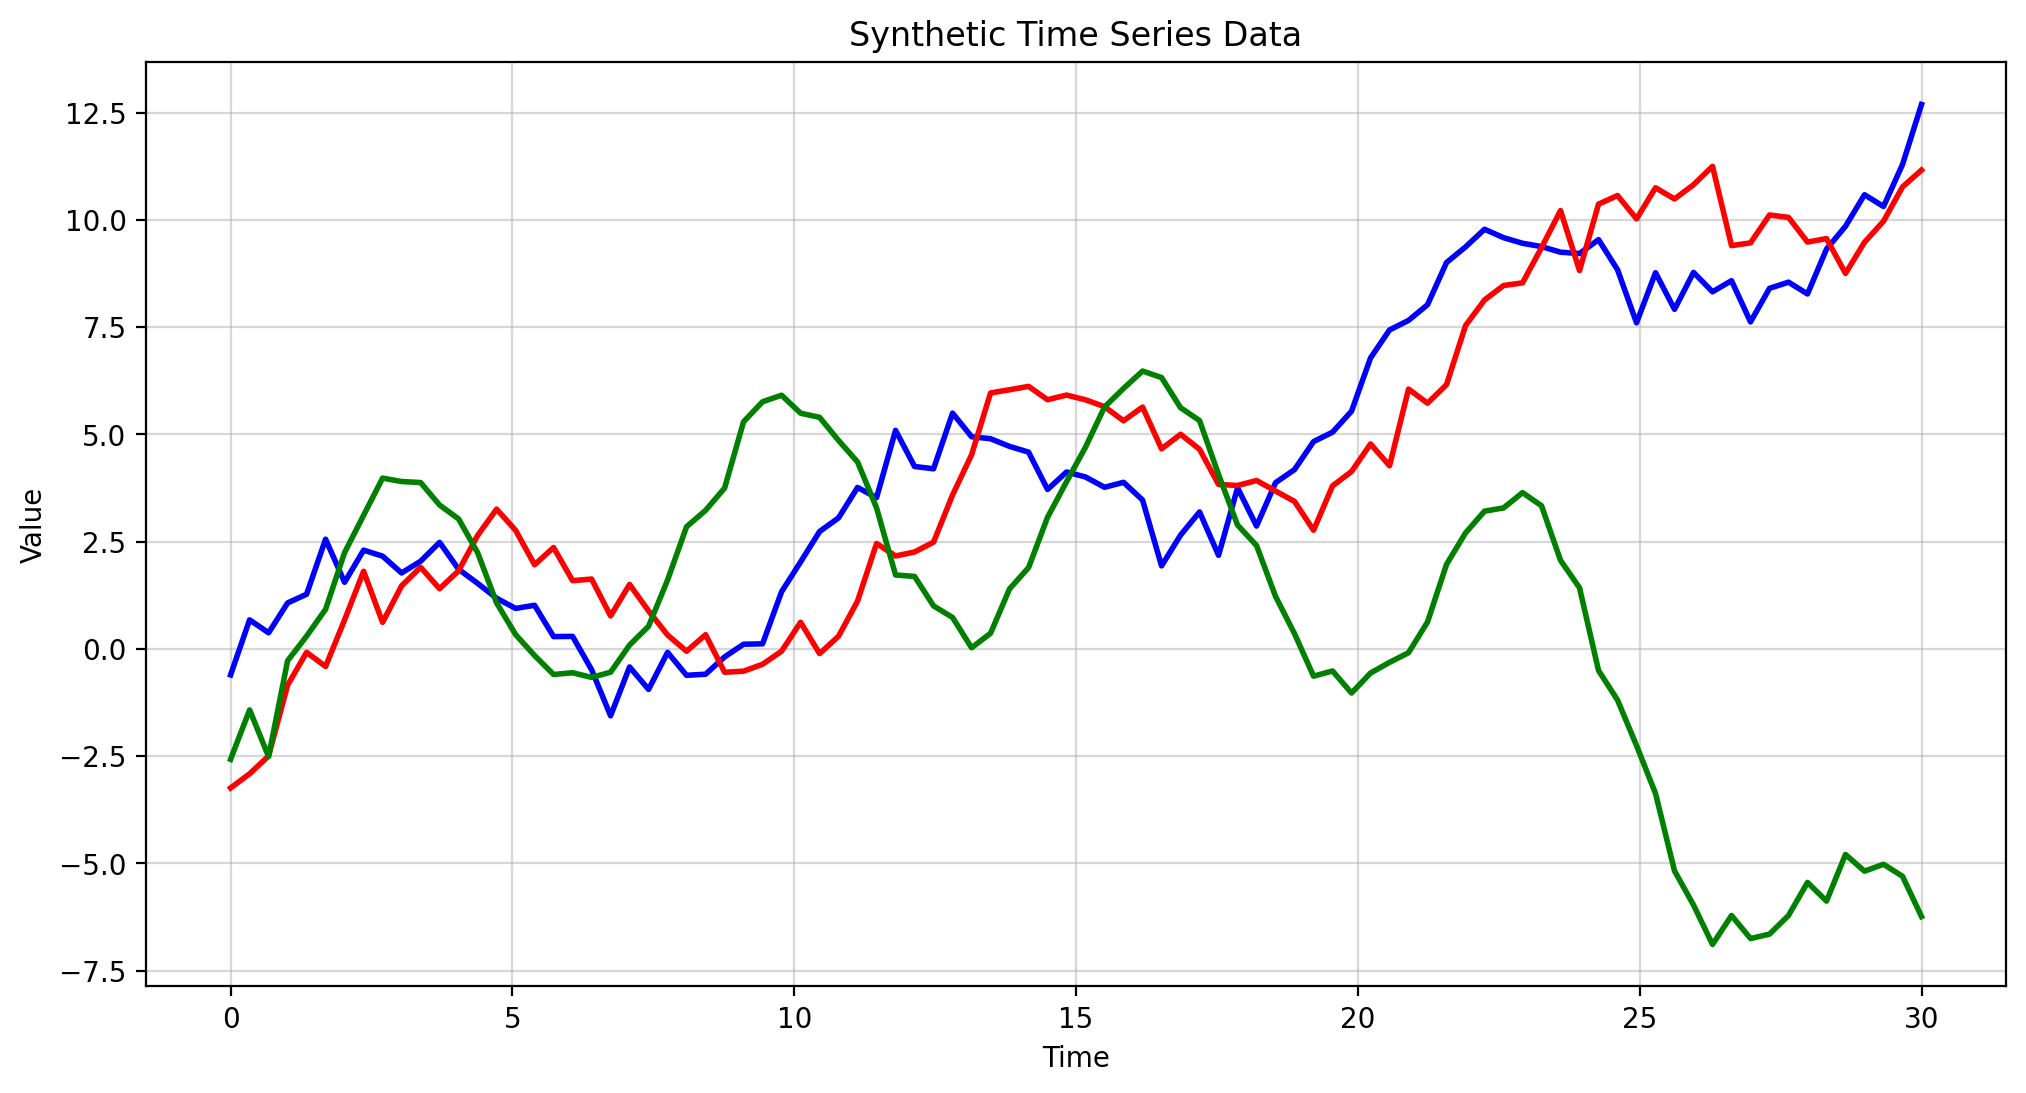

In [9]:
# Adding another synthetic time series with:
amplitude = 3.0               # amplitude increase 2 -> 3
frequency = 0.15             # frequency increase 0.1 -> 0.15
slope = 0.3                  # slope increase 0.1 -> 0.13
curvature_quadratic = 0.01       # quadratic curvature decrease 0.01 -> 0 
curvature_cubic = -0.001       # cubic curvature decrease 0 -> -0.02
noise_level = 0.3             

synthetic_data_3 = generate_synthetic_time_series(t, amplitude, frequency, slope, shift, curvature_quadratic, curvature_cubic,
                                    noise_level, ar_coefficients)


fig, ax = plt.subplots(figsize=(12, 6), dpi=200)

# Plot the synthetic time series data using Seaborn on Matplotlib axis
sns.lineplot(x=t, y=synthetic_data, color="b", linewidth=2, ax=ax)
sns.lineplot(x=t, y=synthetic_data_2, color='r', linewidth=2, ax=ax)
sns.lineplot(x=t, y=synthetic_data_3, color="g", linewidth=2, ax=ax)

# Customize Matplotlib axis
ax.set_title('Synthetic Time Series Data')
ax.set_xlabel('Time')
ax.set_ylabel('Value')
ax.grid(alpha=0.5)



<Figure size 1200x600 with 0 Axes>

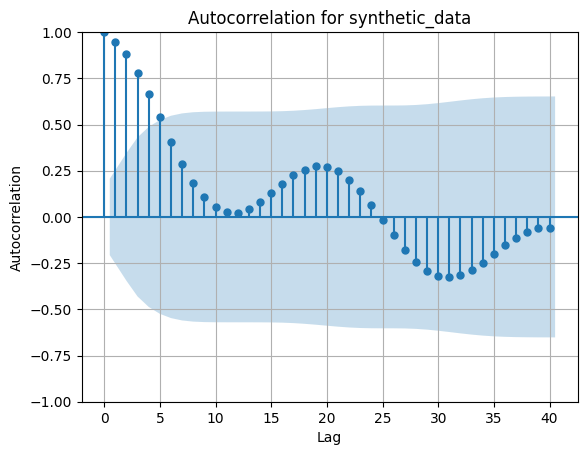

In [10]:
from statsmodels.graphics.tsaplots import plot_acf

figure = plt.figure(figsize=(12, 6))
plot_acf(synthetic_data_3, lags=40, alpha=0.05)  # Adjust the number of lags
plt.title('Autocorrelation for synthetic_data')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.grid(True)
plt.show()

<Axes: xlabel='y(t)', ylabel='y(t + 1)'>

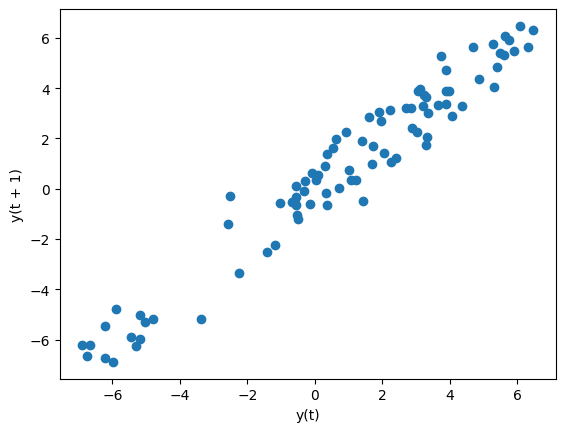

In [11]:
syn_data_3 = pd.DataFrame(synthetic_data_3)
pd.plotting.lag_plot(syn_data_3)

In [12]:
syn_data_3.columns=["y"]
syn_data_3.index.name = "x"
syn_data_3["y"]= syn_data_3["y"].round(3)

In [13]:
import bokeh
from bokeh.io import curdoc, show, output_notebook
from bokeh.layouts import column, row
from bokeh.models import ColumnDataSource, Slider, TextInput, TableColumn, DataTable, NumeralTickFormatter, NumberFormatter
from bokeh.plotting import figure


In [14]:
a = NumberFormatter(format="0.0000")
c= 3.2213323

In [15]:
plot = figure(height=400, width=400, title="Synthetic time series",
              tools="crosshair,pan,reset,save,wheel_zoom",
              x_range=[0, 4*np.pi], y_range=[-7, 25])

source = ColumnDataSource(data=syn_data_3)
#source = ColumnDataSource(data=dict(x=syn_data_3.index, y=syn_data_3.values))
source.data


columns = [
        TableColumn(field="x", title="time"),
        TableColumn(field="y", title="value"),
    ]

data_table = DataTable(source=source, columns=columns, width=400, height=280, editable=True)

show(data_table)
output_notebook()

Loading BokehJS ...

In [21]:
mask = [True for el in source.data["x"]]
len(mask)

90